## GRAD 5100 - Introduction to Data Science

### Final Project - Part 1

#### Ilayda Bekircan

## Q1

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
np.random.seed(1)

- The ID has the form IDxxx where x is a three digit number.
- The Group feature is either A, B, or C.
- Feature_1 is sampled randomly from a normal distribution with mean 2500, standard deviation 300.
- Feature_2 is sampled randomly from a normal distribution with mean 400 and standard deviation 15.
- Feature 3 will be implemented later.

In [3]:
df = pd.DataFrame({
    'ID': ['ID{:03d}'.format(i) for i in range(101, 901)],
    'Group': np.random.choice(['A', 'B', 'C'], size = 800),
    'Feature_1': np.random.normal(loc = 2500, scale = 300, size = 800), #loc is the mean and scale is the std
    'Feature_2': np.random.normal(loc = 400, scale = 15, size = 800),
    'Feature_3': ['0'.format(i) for i in range(1, 801)],
})

In [4]:
#applying formula for each group

df.loc[df['Group'] == 'A', 'Formula'] = 3 * 2500 - 5 * 400
df.loc[df['Group'] == 'B', 'Formula'] = 2 * 2500
df.loc[df['Group'] == 'C', 'Formula'] = -2500 + 400

In [5]:
df

,ID,Group,Feature_1,Feature_2,Feature_3,Formula
0,ID101,B,2932.671943,413.545585,0,5000.0
1,ID102,A,2760.145818,393.654844,0,5500.0
2,ID103,A,2392.765598,378.059694,0,5500.0
3,ID104,B,2725.989116,398.327623,0,5000.0
4,ID105,B,2652.696728,401.211878,0,5000.0
...,...,...,...,...,...,...
795,ID896,C,2426.627326,385.608965,0,-2100.0
796,ID897,A,2936.391349,429.038191,0,5500.0
797,ID898,B,2358.714462,402.774189,0,5000.0
798,ID899,B,2650.914292,378.228709,0,5000.0


In [6]:
df['Feature_3'] = df['Formula'] + np.random.normal(loc = 0, scale = 12, size = 800)

In [7]:
df

,ID,Group,Feature_1,Feature_2,Feature_3,Formula
0,ID101,B,2932.671943,413.545585,5003.631701,5000.0
1,ID102,A,2760.145818,393.654844,5499.932422,5500.0
2,ID103,A,2392.765598,378.059694,5499.940383,5500.0
3,ID104,B,2725.989116,398.327623,5012.666309,5000.0
4,ID105,B,2652.696728,401.211878,5010.972291,5000.0
...,...,...,...,...,...,...
795,ID896,C,2426.627326,385.608965,-2087.511540,-2100.0
796,ID897,A,2936.391349,429.038191,5503.612305,5500.0
797,ID898,B,2358.714462,402.774189,5014.614749,5000.0
798,ID899,B,2650.914292,378.228709,5019.014494,5000.0


<Axes: ylabel='Count'>

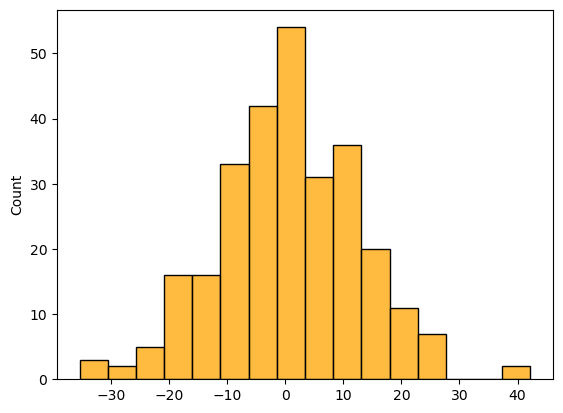

In [8]:
# the difference between Feature_3 and the formula is a normally distributed for group A

sns.histplot(df['Formula'] - df.loc[df['Group'] == 'A', 'Feature_3'], color='orange')

<Axes: ylabel='Count'>

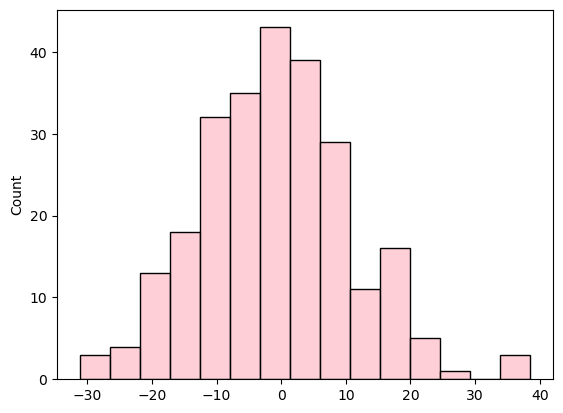

In [9]:
# the difference between Feature_3 and the formula is a normally distributed for group B

sns.histplot(df['Formula'] - df.loc[df['Group'] == 'B', 'Feature_3'], color='pink')

<Axes: ylabel='Count'>

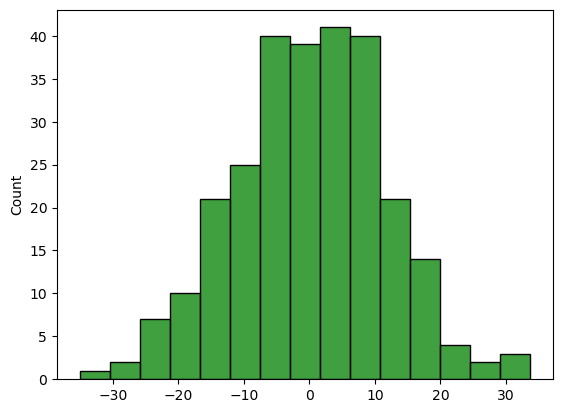

In [10]:
# the difference between Feature_3 and the formula is a normally distributed for group C

sns.histplot(df['Formula'] - df.loc[df['Group'] == 'C', 'Feature_3'], color='green')

In [11]:
# standard deviation of the difference between formula and Feature_3 is approximately 12
np.sqrt(np.var(df['Formula'] - df['Feature_3']))

11.886865178742696

<Axes: ylabel='Count'>

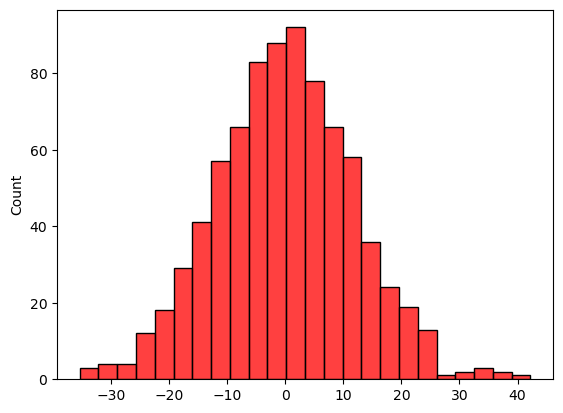

In [12]:
# the difference between Feature_3 and the formula is a normally distributed for all data

sns.histplot(df['Formula'] - df['Feature_3'], color='red')

In [13]:
df = df.drop(['Formula'], axis=1)
df

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID101,B,2932.671943,413.545585,5003.631701
1,ID102,A,2760.145818,393.654844,5499.932422
2,ID103,A,2392.765598,378.059694,5499.940383
3,ID104,B,2725.989116,398.327623,5012.666309
4,ID105,B,2652.696728,401.211878,5010.972291
...,...,...,...,...,...
795,ID896,C,2426.627326,385.608965,-2087.511540
796,ID897,A,2936.391349,429.038191,5503.612305
797,ID898,B,2358.714462,402.774189,5014.614749
798,ID899,B,2650.914292,378.228709,5019.014494


## Q2

a - Based on the theoretical distribution of Feature_1, how many samples do you expect to find where the value of the feature is greater than 3000?

In [14]:
p = stats.norm.cdf(3000, loc = 2500, scale = 300)
1-p

0.047790352272814696

In [15]:
np.round((1-p) * 800)

38.0

b - How many samples did you actually find where Feature_1 is greater than 3000?

In [16]:
df[df['Feature_1'] > 3000].shape[0]

36

c - Group the dataset by the Group field and compute the mean and standard deviation of Feature_3 within each group.

In [17]:
df.groupby('Group').agg({'Feature_3':['mean','std']})

Feature_3           
              mean        std
Group                        
A      5499.495594  12.218756
B      5000.840698  11.878250
C     -2100.071017  11.571894

## Q3

Make a scatterplot of Feature_3 vs Feature_1.

<Axes: xlabel='Feature_3', ylabel='Feature_1'>

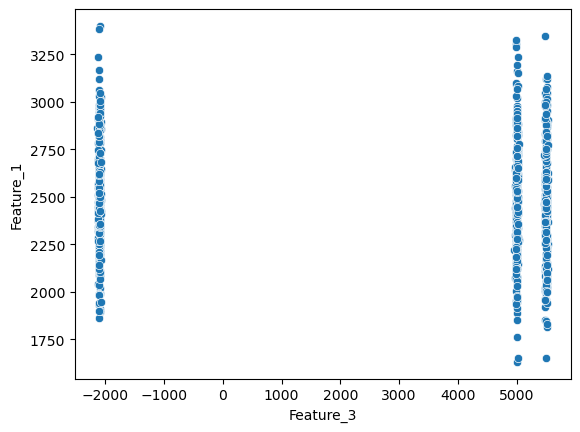

In [18]:
sns.scatterplot(data = df, x = "Feature_3", y = "Feature_1")

In [19]:
df.to_csv('fake_data.csv')